# Using V3 API to calculate wildfire impact using UDF: Portugal Olieros wildfire in 2020-07-25


## Overview

This is a demo script to illustrate the power of AGB Geospatial Analytics. While retrieving and studying about AGB cover can be done in Geospatial Analytics, it can also be used to find out how much the AGB cover has changed over the years.

Specifically, we will analyse the AGB cover for the Olieros area in Portugal by using the power of UDF expressions in Geospatial Analytics which in this case be used to calculate the difference in AGB cover for the years 2020 and 2021. The area that we are analyzing right now is the one that is affected by a huge wildfire on 2020-07-25. You can through the details of the wildfire and its impact [here](https://www.portugalresident.com/extraordinarily-large-extraordinarily-complex-oleiros-fire-finally-dominated/).


Before starting, you have to install ibm pairs using `pip3 install -U ibmpairs`

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial Analytics API credentials in a file named `secrets.ini` in the below format:

```
[EIS]
api.host = https://api.ibm.com/geospatial/run/na/core/v4
api.key = <Your Geospatial Analytics API key>
api.tenant_id = <Your Geospatial Analytics Tenant ID>
api.org_id = <Your Geospatial Analytics Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../auth/secrets.ini')```

Now, let's create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

In [2]:
# install the EIS SDK if not installed already
# pip2 install -U ibmpairs 
import ibmpairs.client as client
import ibmpairs.query as query

# other imports
import os,  datetime
import pandas as pd
import json
import matplotlib.pyplot as plt
import rasterio
import PIL
import numpy as np

import configparser

config = configparser.RawConfigParser()
config.read('../auth/secrets.ini')

EIS_ORG_ID     = config.get('EIS', 'api.org_id') 
EIS_TENANT_ID  = config.get('EIS', 'api.tenant_id') 
EIS_APIKEY     = config.get('EIS', 'api.key')

EIS_client_v3 = client.get_client(org_id    = EIS_ORG_ID,
                                  tenant_id = EIS_TENANT_ID,
                                  api_key   = EIS_APIKEY,
                                  version   = 3
                                )

2024-06-13 14:12:28 - paw - INFO - The client authentication method is assumed to be OAuth2.
2024-06-13 14:12:28 - paw - INFO - Legacy Environment is False
2024-06-13 14:12:28 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2024-06-13 14:12:30 - paw - INFO - Authentication success.
2024-06-13 14:12:30 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


The following code snippet submits the query for the AGB Data Layer <i>above-ground-biomass</i>  for years 2020 and 2021 using Geospatial Analytics V3 query API, waits for it to finish, downloads the data to the download folder, loads the data to memory and displays it on screen. This could take a few minutes to complete as all the data is brought together.

Let's go ahead, define and submit a query.

In [3]:
agb_historical_difference_query_object = query.submit( {
	"name": "Above Ground Biomass Difference - Portugal Olieros wildfire in 2020-07-25",
	"layers": [
		{
			"alias": "AGB_2020",
			"type": "raster",
			"id": "38000",
			"temporal": {
				"intervals": [
					{
						"snapshot": "2020-01-01T00:00:00Z"
					}
				]
			},
			"output": False
		},
		{
			"alias": "AGB_2021",
			"type": "raster",
			"id": "38000",
			"temporal": {
				"intervals": [
					{
						"snapshot": "2021-01-01T00:00:00Z"
					}
				]
			},
			"output": False
		},
		{
			"alias": "AGB_DIFF",
			"expression": "$AGB_2021 - $AGB_2020"
		}
	],
	"spatial": {
		"type": "poly",
		"polygon": {
			"wkt": "MultiPolygon (((-7.91621713790624071 39.79131649386284408, -7.91621713790624071 39.97653166209390463, -7.73332962888095921 39.97653166209390463, -7.73332962888095921 39.79131649386284408, -7.91621713790624071 39.79131649386284408)))"
		}
	},
	"temporal": {
		"intervals": [
			{
				"start": "2020-01-01 00:00:00",
				"end": "2021-12-01 00:00:00"
			}
		]
	}
}, client=EIS_client_v3)
# download the result of the query (this will poll until the result is ready)
agb_historical_difference_query_object.download(verify=False)

2024-06-13 14:12:30 - paw - INFO - TASK: submit STARTING.
2024-06-13 14:12:31 - paw - INFO - The query was successfully submitted with the id: 1718236800_31351774.
2024-06-13 14:12:31 - paw - INFO - TASK: submit COMPLETED.
2024-06-13 14:12:31 - paw - INFO - TASK: download STARTING.
2024-06-13 14:12:33 - paw - INFO - The query 1718236800_31351774 has the status Queued.
2024-06-13 14:12:34 - paw - INFO - The query 1718236800_31351774 has the status Initializing.
2024-06-13 14:13:05 - paw - INFO - The query 1718236800_31351774 has the status Running.
2024-06-13 14:13:36 - paw - INFO - The query 1718236800_31351774 has the status Succeeded.
2024-06-13 14:13:36 - paw - INFO - The query 1718236800_31351774 was successful after checking the status.
2024-06-13 14:14:37 - paw - INFO - The query 1718236800_31351774 has the status Succeeded.
2024-06-13 14:14:37 - paw - INFO - The query 1718236800_31351774 was successful after checking the status.
2024-06-13 14:14:37 - paw - INFO - The query downl

{
    "download_file_name": "1718236800_31351774",
    "download_folder": "/Users/srikantht/EIS/Projects/Environmental-Intelligence-internal/geospatial/v3_apis/samples/industry_usecases/download/",
    "download_status": "SUCCEEDED",
    "id": "1718236800_31351774",
    "layers": [
        {
            "alias": "AGB_2020",
            "id": "38000",
            "output": false,
            "temporal": {
                "intervals": [
                    {
                        "snapshot": "2020-01-01T00:00:00Z"
                    }
                ]
            },
            "type": "raster"
        },
        {
            "alias": "AGB_2021",
            "id": "38000",
            "output": false,
            "temporal": {
                "intervals": [
                    {
                        "snapshot": "2021-01-01T00:00:00Z"
                    }
                ]
            },
            "type": "raster"
        },
        {
            "alias": "AGB_DIFF",
          

### Understanding the above query definition

The above query is an example usage of UDF expressions in Geospatial Analytics. If you observe the query, we have querying the data for a single layer twice for two different temporal timestamps and we are assigning aliases for each call `(AGB_2020, AGB_2021)`. 

Aliases specify a temporary name given to the particular layer's data that can be used later using the UDF expression. 

Subsequently we are defining another alias named `AGB_DIFF` which is a UDF expression of the above two predefined aliases and in this case it stores the information of difference in aliases `(AGB_2021-AGB_2020)`.

We are, then giving the coordinated as a WKT String - These coordinates point the Olieros area in Portugal specifically taken to demonstrate the impact of the wildfire occured in that area over the temporal range of 2020 and 2021.

The raster tiff file which gets generated when the query successfully executes, contain the name of the alaias that an expression is defined for. In this case, it should be 'Expression-AGB_DIFF[AGB_DIFF]-Exp.tiff'.

Let's define some utility functions to plot the downloaded raster tiff(s) and the summary file(s).

In [4]:
def get_extent(f):
    with open(f, 'r') as ff:
        stats = json.load(ff)
    boundingBox=stats["boundingBox"]
    myextent = [boundingBox["minLongitude"],boundingBox["maxLongitude"],boundingBox["minLatitude"],boundingBox["maxLatitude" ] ]
    return myextent


def display_raster(raster_file_name, colorMap, title = None, Max=None, Min=None, myextent=None):
    if  raster_file_name.endswith('.tiff'):
        with rasterio.open(raster_file_name) as raster_file:
            if not myextent:
                myextent=get_extent(raster_file_name+".json")
            data = raster_file.read(1)
            plt.figure(figsize = (20, 12))
            if Max is None:
                Max=data.max()
            if Min is None:
                Min = data.min()
            plt.imshow(data, cmap = colorMap, vmin = Min, vmax = Max,extent = myextent)
            if not title:
                title=os.path.basename(raster_file_name)
            plt.title(title)
            plt.colorbar()
            plt.show()

Let's display the resulting raster tiff file(s) and the summary file(s) using the above methods.

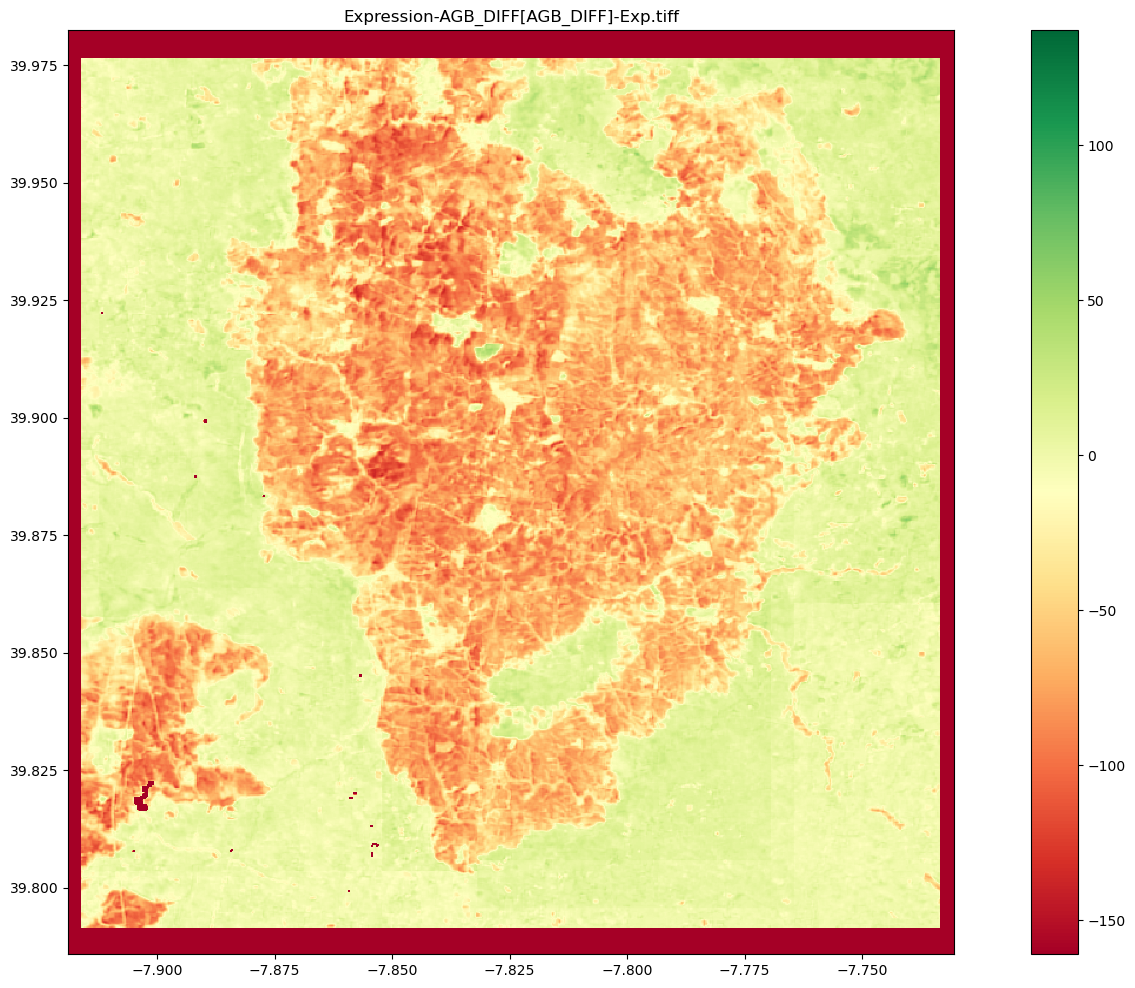

In [5]:
# Now display the resulting Tiff files.
historical_difference_title='Above Ground Biomass-species specific :'+str(agb_historical_difference_query_object.temporal.years)
historical_difference_files_list = agb_historical_difference_query_object.list_files()
historical_difference_files_list.sort()
for f in historical_difference_files_list:
    if f.endswith('.tiff'): #display the raster images
        with open(f+'.json', 'r') as ff:
            fileparms = json.load(ff)
        boundingBox=fileparms["boundingBox"]
        myextent=[boundingBox["minLongitude"],boundingBox["maxLongitude"],boundingBox["minLatitude"],boundingBox["maxLatitude" ] ] 
        display_raster(f, colorMap='RdYlGn', Max=137, Min=-161, myextent=myextent)
            

As we can see in the above raster tiff file, the vegetation cover from the year 2020 has gone down to a rapid extent to the year 2021. All the Red area indicate the decrease in AGB cover impacted by wildfire, and all the Green area is the area unaffected by the wildfire which has no impact in the agb cover. This demonstrates how powerful the UDF expression in Geospatial Analytics is, and how complex operations can be performed with minimal user interaction.

We can leverage the capabilities of Geospatial Analytics and Python together and even visualize the raster tiff file on a realtime map by executing the below code snippet.

[(1, 0, 0, 0), (0.9372549019607843, 0.9725490196078431, 0.6588235294117647, 0.8), (0.9333333333333333, 0.9725490196078431, 0.6549019607843137, 0.8), (0.9254901960784314, 0.9686274509803922, 0.6470588235294118, 0.8), (0.9215686274509803, 0.9686274509803922, 0.6392156862745098, 0.8), (0.9176470588235294, 0.9647058823529412, 0.6313725490196078, 0.8), (0.9098039215686274, 0.9647058823529412, 0.6274509803921569, 0.8), (0.9058823529411765, 0.9607843137254902, 0.6196078431372549, 0.8), (0.9019607843137255, 0.9607843137254902, 0.611764705882353, 0.8), (0.8980392156862745, 0.9568627450980393, 0.6039215686274509, 0.8), (0.8901960784313725, 0.9568627450980393, 0.6, 0.8), (0.8862745098039215, 0.9529411764705882, 0.592156862745098, 0.8), (0.8823529411764706, 0.9529411764705882, 0.5843137254901961, 0.8), (0.8745098039215686, 0.9490196078431372, 0.5764705882352941, 0.8), (0.8705882352941177, 0.9450980392156862, 0.5725490196078431, 0.8), (0.8666666666666667, 0.9450980392156862, 0.5647058823529412, 0.8


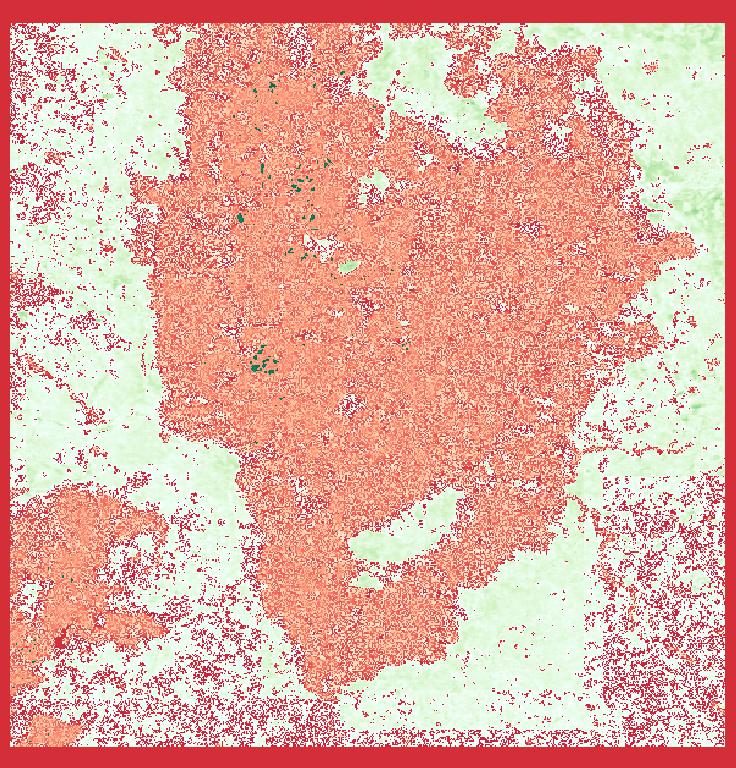

In [7]:

#For visualizing maps
import folium
import branca.colormap as cm, numpy as np
from matplotlib import colors as colors

def create_fast_colormap_for_range(mycmmap_choice, vmin, vmax, empty_val):
    NYcm = mycmmap_choice.scale(vmin,vmax)   # cm.linear.Spectral_07.scale(0, 20)  # .to_step(1)   
    NYcmArray = []
    for i in range(vmin, vmax, 1):
        if i>vmax or i<vmin or  i == empty_val:   # i>20 or i==0:
            NYcmArray.insert(i,(1, 0, 0, 0)) 
        else:
            NYcmArray.insert(i,colors.to_rgba(NYcm(i), 0.8)) 
    return NYcmArray
NYcmArray = create_fast_colormap_for_range(cm.linear.RdYlGn_11, -161, 137, 0) #cm.linear.Spectral_07.scale(0,20)
print(NYcmArray)

agb_historical_difference_file_list = agb_historical_difference_query_object.list_files()
for NY_risk_file in agb_historical_difference_file_list:    
    if NY_risk_file.endswith('.tiff'):
        # print(NY_risk_file)
        with rasterio.open(NY_risk_file) as raster:
            # Display the boundaries of the raster image for a visual check
            rb = raster.bounds
            NYMap = folium.Map( max_bounds=True,
                    location=[(rb.bottom+rb.top)/2, (rb.left+rb.right)/2],   # [40.8768,-73.6195],
                    zoom_start=11,
                    min_lat=rb.bottom, # min_lat,
                    max_lat=rb.top,    # max_lat,
                    min_lon=rb.left,   # min_lon,
                    max_lon=rb.right   #max_lon 
                    )
            # folium.PolyLine([
            #     [rb.bottom, rb.left], [rb.top, rb.left],
            #     [rb.top, rb.right], [rb.bottom, rb.right],
            #     [rb.bottom, rb.left]
            # ], color='black', weight=2.0, opacity=0.8).add_to(NYMap)
            NYdata = raster.read(1).astype(np.uint8)
            folium.raster_layers.ImageOverlay(
                        image=NYdata,opacity=0.7, 
                        colormap=lambda value: NYcmArray[value],
                        bounds=[[rb.bottom, rb.left], [rb.top, rb.right]]
                    ).add_to(NYMap)
            NYMap.add_child(cm.linear.Reds_08.scale(-161, 137))
NYMap